<img align="right" width="250" src="http://www.sobigdata.eu/sites/default/files/logo-SoBigData-DEFINITIVO.png">
**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

<img align="right" width="250" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/601px-Cluster-2.svg.png">

# Clustering with Python

This notebook contains an overview of basic python functionalities for clustering using the [sklearn](http://scikit-learn.org/stable/) library.  
Note: this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

Import of the basic packages to use

In [4]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

df = pd.read_csv('training.csv') 

#REPLACE MISSING VALUES & OUTLIERS in un colpo solo...
#Rimpiazzo gli 0 e 1 dei valori di MMR con np.nan e poi rimpiazzo con la media fatta rispetto a, dapprima Make, Model e SubModel
#(di cui se ne trovano la maggior parte), poi Make e Model, e poi Make per i pochi rimasti
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(1, np.nan)

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(0, np.nan)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(1, np.nan)

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(0, np.nan)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(1, np.nan)

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(0, np.nan)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(1, np.nan)

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(0, np.nan)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(1, np.nan)

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

#Sostituzione missing values colonna TopThreeAmericanName
df.loc[15769,'TopThreeAmericanName']='GM' 
df.loc[18532,'TopThreeAmericanName']='CHRYSLER'
df.loc[20016,'TopThreeAmericanName']='CHRYSLER'
df.loc[35157,'TopThreeAmericanName']='CHRYSLER'

#Rimpiazzo i valori nulli di Nationality con AMERICAN perche' i 4 che mancavano di TopThreeAmericanName erano tutti americani
df['Nationality'] = df['Nationality'].fillna('AMERICAN')

#IMPORTANTE: Siccome le righe con valori nulli di Color e SubModel sono gli stessi (e sono solo 7) li togliamo:
df=df.dropna(subset=['SubModel', 'Color']) 

#Rimpiazzati i missing values di Transmission (con la moda fra le macchine dello stesso modello (e stesso Make))
df['Transmission'] = df['Transmission'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mode()[0])) #faccio la moda perche' sono 'Transimission' stringhe

#Convertito la colonna Trim a stringa (c'erano dei valori interi che impedivano di calcolare la moda)
df['Trim']=df['Trim'].astype(str) 
df['Trim'] = df['Trim'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna Trim con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['Trim'] = df.groupby(['Make','Model', 'SubModel']).Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby(['Make','Model']).Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby('Make').Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make Model (molto precisa)
df['WheelType']=df['WheelType'].astype(str) 
df['WheelType'] = df['WheelType'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['WheelType'] = df.groupby(['Make','Model','SubModel']).WheelType.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['WheelType'] = df.groupby(['Make','Size']).WheelType.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['WheelType'] = df.groupby('Make').WheelType.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#eliminiamo Primeunit e AUCGUART perche' mancano 55703 valori
df = df.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

#eliminiamo BYRNO, RefId, VNZIP1 e WheelTypeID perche' non forniscono informazione
df = df.drop(['BYRNO', 'RefId','WheelTypeID', 'VNZIP1'], axis=1)

#Togliamo le righe che hanno Size o Trim np.nan (4 di Size e 1 di Trim)
df=df.dropna(subset=['Size','Trim'])

#Outlier: c'e' un valore di VehBCost uguale a 1. Lo trattiamo come un outlier sostituendolo con la media fatta raggruppando su Make e Model
df['VehBCost'] = df['VehBCost'].replace(1, np.nan)
df['VehBCost'] = df['VehBCost'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

#Aggiunta di una nuova colonna
df['MilesPerYear'] = df['VehOdo'] / df['VehicleAge']


#df.describe()
#df.isnull().sum()

#------------------------------------------- CLUSTERING -------------------------------------------------------------

#eliminazione classe da predire
classes = df['IsBadBuy'] 
del df['IsBadBuy']

#sostituzione attributi non numerici con attributi numerici, e cancellazione delle colonne non utili per il cluster
del df['PurchDate']
del df['SubModel'] #son troppi
del df['Model']
del df['Nationality']
del df['TopThreeAmericanName']
del df['VNST']
del df['Color']
del df['Trim']
del df['Auction'] #son troppi
del df['Make']
del df['Size']
del df['Transmission']
del df['WheelType']
del df['IsOnlineSale']
del df['VehYear']
del df['MilesPerYear']
df['AcquisitionAveragePrice']=(df['MMRAcquisitionAuctionAveragePrice']+df['MMRAcquisitionAuctionCleanPrice']+df['MMRAcquisitionRetailAveragePrice']+df['MMRAcquisitonRetailCleanPrice'])/4.0
df['CurrentAveragePrice']=(df['MMRCurrentAuctionAveragePrice']+df['MMRCurrentAuctionCleanPrice']+df['MMRCurrentRetailAveragePrice']+df['MMRCurrentRetailCleanPrice'])/4.0
del df['MMRAcquisitionAuctionAveragePrice']
del df['MMRAcquisitionAuctionCleanPrice'] 
del df['MMRAcquisitionRetailAveragePrice']
del df['MMRAcquisitonRetailCleanPrice']
del df['MMRCurrentAuctionAveragePrice']
del df['MMRCurrentAuctionCleanPrice']
del df['MMRCurrentRetailAveragePrice']
del df['MMRCurrentRetailCleanPrice']


#------------------------------------------------- KMeans ------------------------------------------------------------
#1) eliminare i categorici con pochi valori per vedere se SSE si abbassa; eliminare IsOnlineSale, VehYear. fare KMeans con Z-score e salvare l'immagine

#2) provare MiniMax e salvare l'immagine

#3) scegliere un k e una normalizzazione (cio' che minimizza SSE) e concentrarsi su quelli.

#4) eseguire  (rivedere il codice...)
#kmeans = KMeans(n_clusters=__ktrovato__, n_init=10, max_iter=300)
#kmeans.fit(X)
#kmeans.labels_[:5]
#np.unique(kmeans.labels_, return_counts=True)
#hist, bins = np.histogram(kmeans.labels_, 
#                          bins=range(0, len(set(kmeans.labels_)) + 1))
#dict(zip(bins, hist))

#5) stampare SSE e Silhouette_Score

#6) stampare tutti i grafici per tutte le coppie 
#for column1 in df:
#    for column2 in range(column1 + 1, len(df)): 
#        plt.scatter(df['sepal length'], df['petal width'], 
#                    c=kmeans.labels_, s=20)
#        plt.tick_params(axis='both', which='major', labelsize=22)
#        plt.show()

#--------------------------------------------------DBSCAN ------------------------------------------------------
#1) togliere i categorici e quelli tolti in KMeans
#2) provare min_sample da 5 a 100 a passi di 5 e salvare il grafico.
#3) a mano ricavare il best eps dal grafico (non si puo' automatizzare)
#4) stampare silhouette_coeff per ogni risultato
#5) trovare best silhouette_coeff e tenere la coppia (eps, min_sample) con il migliore silhouette_coeff
#6) trovato la best coppia (eps, min_sample) fare i cluster di tutte le coppie

#-------------------------------------------------- Hierarcical -------------------------------------------------

#1)studiare

In [2]:
df.head()

,VehicleAge,VehOdo,VehBCost,WarrantyCost,AcquisitionAveragePrice,CurrentAveragePrice
0,2,61184,6100.0,533,8824.00,8604.50
1,3,92383,4000.0,1630,6459.25,6459.25
2,2,45965,7500.0,693,9843.00,9417.50
3,4,80169,4725.0,1633,6217.00,6217.00
4,4,77372,5670.0,1623,6522.75,6584.25


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Primo tipo di normalizzazione: Z-Score 
#scaler = StandardScaler()
#X = scaler.fit_transform(df.values)

#Secondo metodo di normalizzazione: MiniMax
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

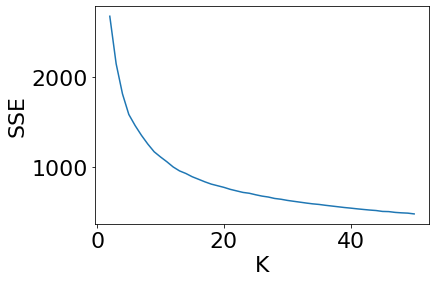

1192 seconds needed


In [4]:
# -------------------------------------------------- KMeans ------------------------------------------------------------

#Lanciamo 50 volte l'algoritmo KMeans e salviamo su file la lista delle 50 sse
#corrispondenti ai vari k con la normalizzazione MiniMax
from datetime import datetime

start = datetime.now()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
fp1 = open('sse_list_MinMax.txt', 'w')

for i in range(len(sse_list)):
    if(i != len(sse_list) - 1):
        fp1.write(str(sse_list[i]) + ', ')
    else:
        fp1.write(str(sse_list[i]))
        
fp1.close()

plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

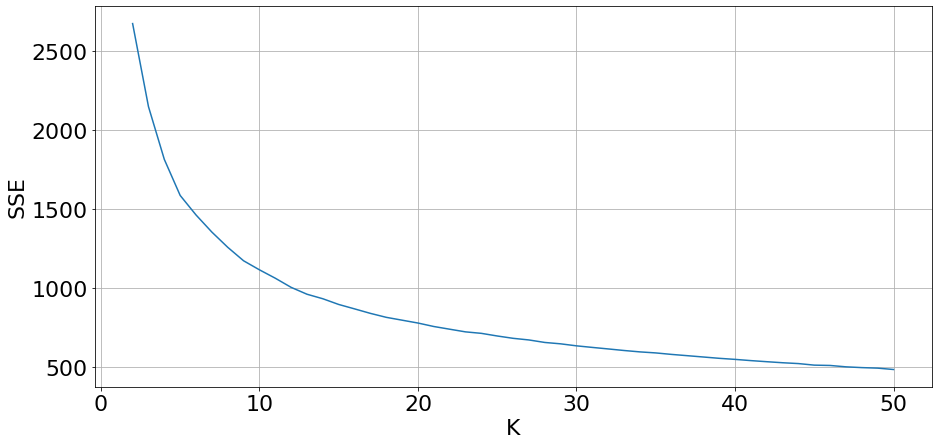

In [5]:
#Leggiamo dal file la lista delle sse con normalizzazione MiniMax e stampiamo il grafico

import matplotlib.pyplot as plt
import numpy as np

fp = open('sse_list_MinMax.txt', 'r')
sse_list_string = fp.readline().split(',')

sse_list = []
for element in sse_list_string:
    sse_list.append(float(element))
    
x = range(2, len(sse_list) + 2)
y = sse_list

plt.figure(figsize = (15, 7))
plt.plot(x,y)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 2149.3132071623672
Silhouette 0.2658817459854823


In [7]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1814.621761792839
Silhouette 0.24315482637329053


In [8]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1586.0474199909916
Silhouette 0.2401980464980979


In [9]:
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1459.2045413786009
Silhouette 0.23555955641109796


In [10]:
kmeans = KMeans(n_clusters=7, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1346.7017213220142
Silhouette 0.23434933798085428


In [11]:
kmeans = KMeans(n_clusters=8, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1265.908832406881
Silhouette 0.22362673040816985


In [12]:
kmeans = KMeans(n_clusters=9, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1177.4218063084204
Silhouette 0.22997404394375867


In [13]:
kmeans = KMeans(n_clusters=10, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1113.5837236912437
Silhouette 0.21988439028221723


In [14]:
kmeans = KMeans(n_clusters=11, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1054.890128782202
Silhouette 0.21781753343188529


In [15]:
kmeans = KMeans(n_clusters=12, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 1003.1079128386889
Silhouette 0.2218532190159675


In [16]:
kmeans = KMeans(n_clusters=13, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 959.6227443137846
Silhouette 0.2186424450596725


In [17]:
kmeans = KMeans(n_clusters=14, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 924.6946165609766
Silhouette 0.2194763628171179


In [18]:
kmeans = KMeans(n_clusters=15, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 893.1948739017313
Silhouette 0.2166202303023755


In [19]:
kmeans = KMeans(n_clusters=16, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 862.5814275914802
Silhouette 0.21549593263713182


In [20]:
kmeans = KMeans(n_clusters=17, n_init=10, max_iter=300)
kmeans.fit(X)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 837.2642748305223
Silhouette 0.2164647482636008


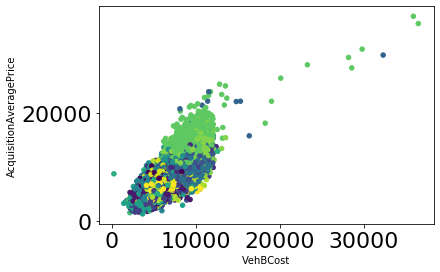

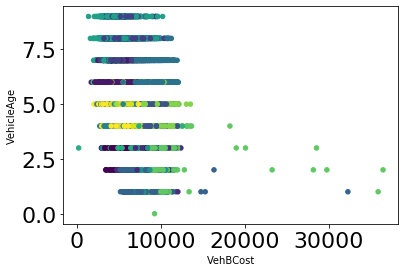

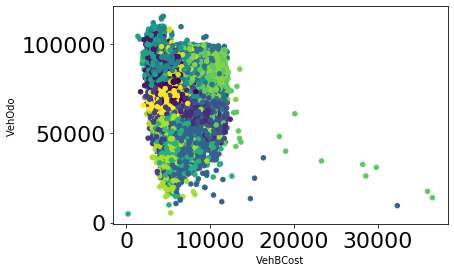

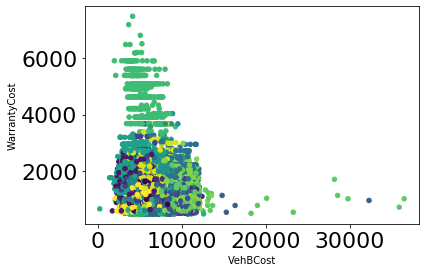

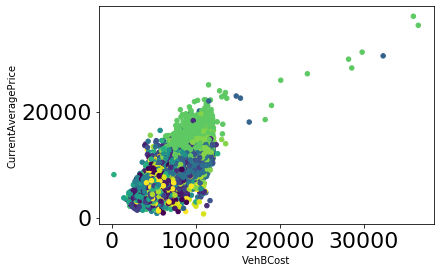

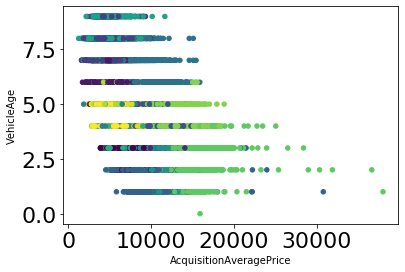

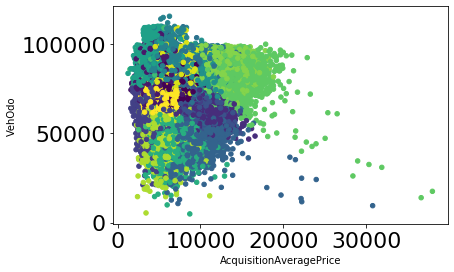

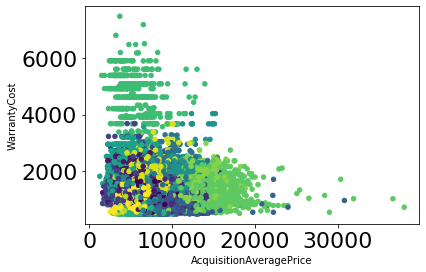

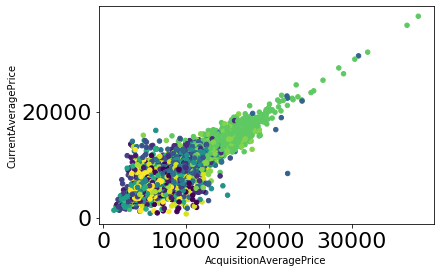

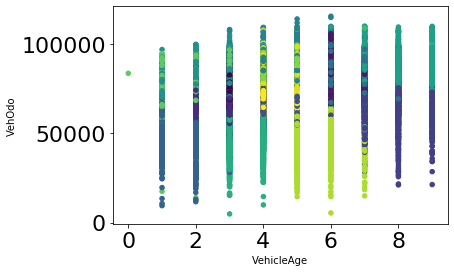

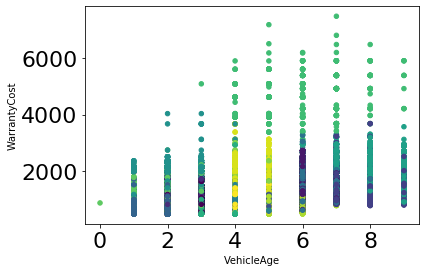

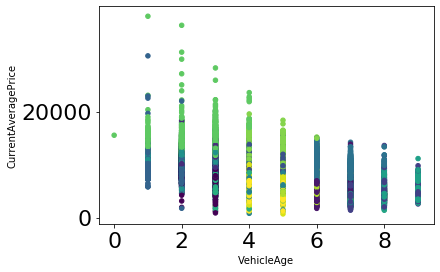

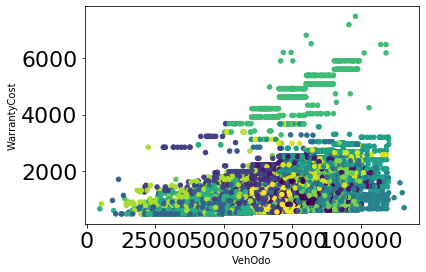

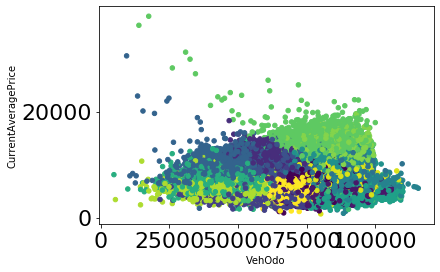

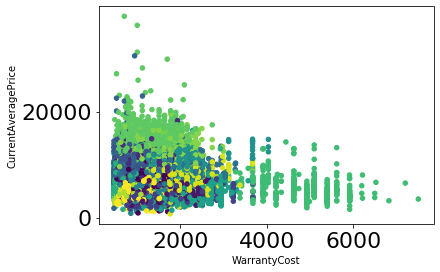

In [21]:
#VehicleAge, VehOdo, VehBCost, WarrantyCost, AcquisitionAveragePrice, CurrentAveragePrice

varlist=['VehBCost','AcquisitionAveragePrice','VehicleAge', 'VehOdo','WarrantyCost', 'CurrentAveragePrice']
for i in range (len(varlist)):
    for j in range (i+1,len(varlist)):
        plt.scatter(df[varlist[i]], df[varlist[j]], c=kmeans.labels_, s=20)
        plt.xlabel(varlist[i])
        plt.ylabel(varlist[j])
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.show() 

In [22]:
#Grafici di tutti i min_samples e k (prima bisogna avere già X normalizzata con Z-Score o MinMax)

from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

start = datetime.now()

dist = pdist(X) #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

for k in range (5,100,5):
    kth_distances = list()
    for d in dist:
            index_kth_distance = np.argsort(d)[k]
            kth_distances.append(d[index_kth_distance])
    k1= str(k)
    fp2 = open('kth_distances_with_minsamples_MiniMax_'+k1+'.txt', 'w')
    for i in range(len(kth_distances)):
        if(i != len(kth_distances) - 1):
            fp2.write(str(kth_distances[i])+', ')
        if(i == len(kth_distances) - 1):
            fp2.write(str(kth_distances[i]))        

    fp2.close()
    
end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

[0.35583648 0.14862145 0.33721073 ... 0.33446174 0.64031762 0.41288128]

[[0.         0.35583648 0.14862145 ... 0.21928655 0.40862608 0.73966109]
 [0.35583648 0.         0.47895263 ... 0.25275824 0.27737705 0.60763341]
 [0.14862145 0.47895263 0.         ... 0.28165309 0.50592492 0.78587187]
 ...
 [0.21928655 0.25275824 0.28165309 ... 0.         0.33446174 0.64031762]
 [0.40862608 0.27737705 0.50592492 ... 0.33446174 0.         0.41288128]
 [0.73966109 0.60763341 0.78587187 ... 0.64031762 0.41288128 0.        ]]
8872 seconds needed


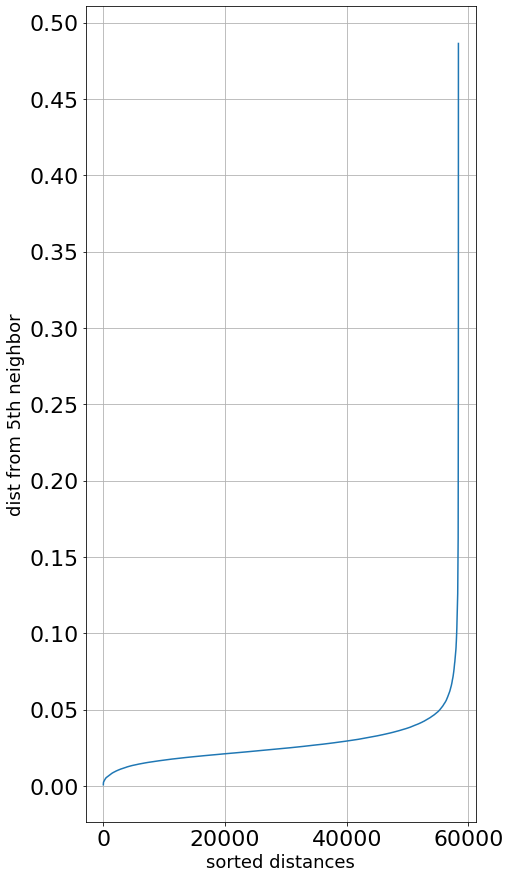

In [73]:
#Ginocchio per DBSCAN minsamples = 5

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_5.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 5th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [7]:
from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41], dtype=int64), array([ 1393,  6649, 12461, 13444, 10028,  2218,  3486,  6104,  1611,
         391,   199,    26,    15,    29,     5,    17,    53,    15,
          11,    17,    16,    19,     7,     8,     8,    10,    22,
           8,    11,    12,     6,    10,     7,     7,     5,     7,
           5,     9,     6,     4,     5,     4,     6], dtype=int64))
Silhouette -0.005192586541289385


In [8]:
#Ginocchio per DBSCAN minsamples = 10

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_10.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 10th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'kth_distances_with_minsamples_MiniMax_10.txt'

In [9]:
dbscan = DBSCAN(eps=0.06, min_samples=10)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20], dtype=int64), array([ 1138,  6684, 12532, 13496, 10076,  2435,  3536,  6151,  1645,
         426,    29,    17,    69,    17,    19,    17,    15,    15,
          27,    13,    10,     7], dtype=int64))
Silhouette 0.08321989475005465


In [ ]:
#Ginocchio per DBSCAN minsamples = 15

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_15.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 15th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [10]:
dbscan = DBSCAN(eps=0.06, min_samples=15)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19], dtype=int64), array([ 1508,  6660, 12498, 13465, 10056,  2413,  3492,  6127,  1601,
         345,    29,    17,    17,    31,    25,    11,    16,    19,
          11,    16,    17], dtype=int64))
Silhouette 0.08333504830501558


In [ ]:
#Ginocchio per DBSCAN minsamples = 20

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_20.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 20th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [11]:
dbscan = DBSCAN(eps=0.065, min_samples=20)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), array([ 1458,  6681, 12529, 13479, 10080,  2427,  3512,  6151,  1621,
         340,    37,    29,    30], dtype=int64))
Silhouette 0.08365326609028285


In [ ]:
#Ginocchio per DBSCAN minsamples = 25

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_25.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 25th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [12]:
dbscan = DBSCAN(eps=0.065, min_samples=25)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64), array([ 1706,  6676, 12512, 13457, 10060,  2408,  3491,  6129,  1596,
         310,    29], dtype=int64))
Silhouette 0.08502141857514556


In [ ]:
#Ginocchio per DBSCAN minsamples = 30

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_30.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 30th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [13]:
dbscan = DBSCAN(eps=0.07, min_samples=30)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([ 1547,  6683, 12542, 13490, 10082,  2419,  3517,  6146,  1627,
         321], dtype=int64))
Silhouette 0.08978257610945221


In [ ]:
#Ginocchio per DBSCAN minsamples = 35

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_35.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 35th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [14]:
dbscan = DBSCAN(eps=0.07, min_samples=35)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([ 1689,  6681, 12524, 13478, 10074,  2408,  3501,  6134,  1596,
         289], dtype=int64))
Silhouette 0.08820539264716327


In [ ]:
#Ginocchio per DBSCAN minsamples = 40

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_40.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 40th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [15]:
dbscan = DBSCAN(eps=0.075, min_samples=40)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([ 1470,  6691, 12571, 13514, 10089,  2430,  3529,  6152,  1620,
         308], dtype=int64))
Silhouette 0.09012954530888108


In [ ]:
#Ginocchio per DBSCAN minsamples = 45

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_45.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 45th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [16]:
dbscan = DBSCAN(eps=0.08, min_samples=45)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([ 1276,  6706, 12594, 13534, 10109,  2444,  3544,  6174,  1658,
         335], dtype=int64))
Silhouette 0.09213811480532869


In [ ]:
#Ginocchio per DBSCAN minsamples = 50

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_50.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 50th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [17]:
dbscan = DBSCAN(eps=0.085, min_samples=50)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([ 1151,  6715, 12607, 13557, 10123,  2456,  3559,  6191,  1669,
         346], dtype=int64))
Silhouette 0.09331652039945562


In [ ]:
#Ginocchio per DBSCAN minsamples = 55

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_55.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 55th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [20]:
dbscan = DBSCAN(eps=0.09, min_samples=55)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([ 1053,  6724, 12619, 13570, 10135,  2464,  3569,  6204,  1683,
         353], dtype=int64))
Silhouette 0.09433084015514029


In [ ]:
#Ginocchio per DBSCAN minsamples = 60

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_60.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 60th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [21]:
dbscan = DBSCAN(eps=0.09, min_samples=60)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([ 1095,  6723, 12614, 13565, 10133,  2460,  3567,  6202,  1670,
         345], dtype=int64))
Silhouette 0.09373708707172125


In [ ]:
#Ginocchio per DBSCAN minsamples = 65

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_65.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 65th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [22]:
dbscan = DBSCAN(eps=0.095, min_samples=65)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([ 1000,  6729, 12628, 13583, 10141,  2470,  3573,  6211,  1682,
         357], dtype=int64))
Silhouette 0.09485016038891762


In [ ]:
#Ginocchio per DBSCAN minsamples = 70

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_70.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 70th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.095, min_samples=70)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

In [ ]:
#Ginocchio per DBSCAN minsamples = 75

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_75.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 75th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.10, min_samples=75)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

In [ ]:
#Ginocchio per DBSCAN minsamples = 80

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_80.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 80th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.10, min_samples=80)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

In [ ]:
#Ginocchio per DBSCAN minsamples = 85

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_85.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 85th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.10, min_samples=85)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

In [ ]:
#Ginocchio per DBSCAN minsamples = 90

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_90.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 90th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.10, min_samples=90)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

In [ ]:
#Ginocchio per DBSCAN minsamples = 95

import matplotlib.pyplot as plt
import numpy as np

fp = open('kth_distances_with_minsamples_MiniMax_95.txt', 'r')
kth_distances_string = fp.readline().split(',')

kth_distances = []
for element in kth_distances_string:
    kth_distances.append(float(element))
    
fig = plt.figure(figsize = (7, 15))
x = range(0, len(kth_distances))
y = sorted(kth_distances)
ax = fig.gca()
ax.set_yticks(np.arange(0, 1.5, 0.05))
plt.plot(x,y)
plt.ylabel('dist from 95th neighbor', fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.grid()
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.10, min_samples=95)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

In [ ]:
# --------------------------------------------------- Hierarchical --------------------------------------------------

from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

start = datetime.now()

In [ ]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

In [ ]:
start = datetime.now()

res = dendrogram(data_link, color_threshold=1.0)

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

In [ ]:
start = datetime.now()

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

In [ ]:
start = datetime.now()

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))